<a href="https://colab.research.google.com/github/jiyeonjin/0624_new/blob/main/0813_%ED%8C%80%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shutil
import os

folder = "/content"
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)  # 파일 또는 심볼릭 링크 삭제
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)  # 폴더(디렉토리) 삭제
    except Exception as e:
        print(f'Failed to delete {file_path}. Reason: {e}')

# 위 코드는 아래 코드들에서 오류났을 때, 처음부터 다시 시작하고 싶을 때, 생긴 파일을 다 삭제해주는 코드! (리셋느낌)

## 필요한 라이브러리 설치

In [ ]:
!pip install torch torchvision
!pip install segmentation-models-pytorch
!pip install albumentations
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

## 라벨링하고 저장한 zip파일 불러온 뒤 압축 해제

In [ ]:
from google.colab import files
import zipfile
import os

# ZIP 파일 업로드
uploaded = files.upload()

# 업로드된 파일명 가져오기 (ZIP 파일명)
zip_filename = list(uploaded.keys())[0]

# 압축 해제할 경로 지정 (예: ./data)
extract_path = './data'
os.makedirs(extract_path, exist_ok=True)

# ZIP 압축 해제
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("압축 해제 완료, 데이터 위치:", extract_path)


Saving segmentation_.v1i.png-mask-semantic.zip to segmentation_.v1i.png-mask-semantic.zip
압축 해제 완료, 데이터 위치: ./data


### 아래 코드들은 그냥 파일 확인하는 용도

In [ ]:
import os

valid_dir = '/content/data/valid'
print("valid 폴더 내 파일/폴더 목록:", os.listdir(valid_dir))

valid 폴더 내 파일/폴더 목록: ['-02_mp4-0452_jpg.rf.d904c518e4b1bb2585f1bc3b207a29f5.jpg', '-02_mp4-0087_jpg.rf.26d253824cbbbb43b7465268169758d2_mask.png', '-02_mp4-0295_jpg.rf.afb6aeec6a7791747cf3beafb1751873_mask.png', '-02_mp4-0666_jpg.rf.d4e10c64c9d13dfe0fe94a5553995bd4_mask.png', '-02_mp4-0519_jpg.rf.64c96a2db17d0f01c463bb574287b1b7_mask.png', '-02_mp4-0164_jpg.rf.43ef21e4f9cf21e842d1b4e9cceb80fc_mask.png', '-02_mp4-0048_jpg.rf.3712ffa9855a929e71842b4a48961261.jpg', '-02_mp4-0662_jpg.rf.477e90dfdefdbe40a533453a4ee43fc6_mask.png', '-02_mp4-0183_jpg.rf.fa1d720039756a1d97fd5a35c8af5fde_mask.png', '0723_mp4-0182_jpg.rf.738bda997fbb1d2862cad06cb7e4b533_mask.png', '-02_mp4-0095_jpg.rf.b2bae421cd8cc54eae18feecf5bc4dfc_mask.png', '-02_mp4-0700_jpg.rf.67242038b3b516618ad04b3eacd6071f_mask.png', '-02_mp4-0626_jpg.rf.458b9c2375a64b63296f6187fd975672_mask.png', '-02_mp4-0768_jpg.rf.bfc75260836eaa8a280c69161958e298_mask.png', '0723_mp4-0027_jpg.rf.f5844ebfa7f14b7dcfee037fce1e9ade_mask.png', '-02_mp4-07

In [ ]:
import os
print("현재 작업 디렉토리:", os.getcwd())

현재 작업 디렉토리: /content


In [ ]:
import os

data_dir = '/content/data'
print("data 폴더 내:", os.listdir(data_dir))

data 폴더 내: ['README.roboflow.txt', 'README.dataset.txt', 'valid', 'test', 'train']


In [ ]:
import os

base_dir = '/content/data'

for split in ['train', 'valid', 'test']:
    split_path = os.path.join(base_dir, split)
    print(f"{split} 폴더 내 파일/폴더 목록:", os.listdir(split_path))

train 폴더 내 파일/폴더 목록: ['-02_mp4-0668_jpg.rf.753102e7ab4d2ca80be5f9c5958e45dc_mask.png', '-02_mp4-0653_jpg.rf.030ea29b976ee4bc49fab16a45adb878_mask.png', '-02_mp4-0217_jpg.rf.1cc5455cac6fc82724cb3bb4bf5e4656_mask.png', '-02_mp4-0746_jpg.rf.9f3399f56d8193e62af94e480e3e5f48.jpg', '-02_mp4-0041_jpg.rf.9a7a3b4d1c3f40cae2aee06a62ceba70.jpg', '-02_mp4-0109_jpg.rf.9d95679903dcb2c8b03b1409fecb3f9f.jpg', '-02_mp4-0271_jpg.rf.c304ac0e5d22246789dba0e442236aac.jpg', '-02_mp4-0460_jpg.rf.d73f75ac8bb6b3100a7f10b1be972bab.jpg', '-02_mp4-0204_jpg.rf.809ee700132ceaaca9c7881c93e83930_mask.png', '-02_mp4-0745_jpg.rf.b40123a8dcb34c4f527ad30514ade14a.jpg', '-02_mp4-0763_jpg.rf.2a220887c38c31d397bf397df9fd054e.jpg', '-02_mp4-0020_jpg.rf.dee5a2f2fc72f7f6df2695d26db1ff55.jpg', '-02_mp4-0657_jpg.rf.d125f1de83f3d89c335073717afd24bd_mask.png', '-02_mp4-0775_jpg.rf.f827f339b0c6cdf37de682455bca3e1b.jpg', '0723_mp4-0187_jpg.rf.8183279edc0fd3f4aede633c8f94ce7b_mask.png', '-02_mp4-0046_jpg.rf.941ac6475286c4220e082b829c

## 이미지와 마스크 파일을 구분
- 다 섞여있어서 mask.png파일과 jpg파일을 구분해주는 작업

In [ ]:
import os
import shutil

def separate_images_and_masks(data_dir):
    # 이미지와 마스크 파일을 구분하는 확장자 또는 규칙에 맞게 분류
    image_exts = ['.jpg', '.jpeg', '.png']  # 실제 이미지 확장자
    mask_exts = ['.png']                    # 마스크 확장자 (보통 png)

    # 새 폴더 경로 지정
    image_folder = os.path.join(data_dir, 'images')
    mask_folder = os.path.join(data_dir, 'masks')
    os.makedirs(image_folder, exist_ok=True)
    os.makedirs(mask_folder, exist_ok=True)

    # 데이터 폴더 내 파일 목록 가져오기
    all_files = os.listdir(data_dir)

    for file_name in all_files:
        file_path = os.path.join(data_dir, file_name)

        # 파일 여부 확인
        if os.path.isfile(file_path):
            ext = os.path.splitext(file_name)[1].lower()

            # 확장자에 따라 폴더로 이동
            if ext in image_exts and 'mask' not in file_name.lower():
                shutil.move(file_path, os.path.join(image_folder, file_name))
            elif ext in mask_exts and 'mask' in file_name.lower():
                shutil.move(file_path, os.path.join(mask_folder, file_name))

    print(f"{data_dir} 내 이미지와 마스크 파일을 분리해 각각 images/, masks/ 폴더에 옮겼습니다.")

# train, valid, test 각각에 대해 실행
base_dir = '/content/data'
for split in ['train', 'valid', 'test']:
    split_dir = os.path.join(base_dir, split)
    separate_images_and_masks(split_dir)


/content/data/train 내 이미지와 마스크 파일을 분리해 각각 images/, masks/ 폴더에 옮겼습니다.
/content/data/valid 내 이미지와 마스크 파일을 분리해 각각 images/, masks/ 폴더에 옮겼습니다.
/content/data/test 내 이미지와 마스크 파일을 분리해 각각 images/, masks/ 폴더에 옮겼습니다.


## 차선 분할 학습용 데이터셋 클래스

In [ ]:
import os
import cv2
import numpy as np
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2

class LaneSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted(os.listdir(image_dir))
        self.masks = sorted(os.listdir(mask_dir))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.masks[idx])

        # 이미지 불러오기
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # 마스크 불러오기 (그레이스케일)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # 이미지와 마스크 크기 맞추기 (예: 이미지 크기에 맞춤)
        if image.shape[:2] != mask.shape[:2]:
           mask = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

        # 마스크 이진화
        #mask = np.where(mask == 255, 1, 0).astype('float32') <- 처음에 이 코드로 했지만 오류나서 주석처리 후 아래 함수로 다시 진행
        # 마스크를 0이 아닌 곳을 모두 1(차선)로
        mask = (mask != 0).astype('float32')


        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        return image, mask.unsqueeze(0)


## 이미지와 마스크를 모델 입력에 맞게 전처리하는 파이프라인

In [ ]:
transform = A.Compose([
    A.Resize(256, 256),  #입력 이미지와 마스크를 모두 256x256 픽셀 크기로 크기 조정
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    # 이미지의 각 채널별로 평균과 표준편차를 이용하여 정규화
    ToTensorV2() #이미지와 마스크를 PyTorch가 처리할 수 있는 텐서(tensor) 형태로 변환
])

In [ ]:
from torch.utils.data import DataLoader

train_image_dir = '/content/data/train/images'
train_mask_dir = '/content/data/train/masks'
valid_image_dir = '/content/data/valid/images'
valid_mask_dir = '/content/data/valid/masks'

train_dataset = LaneSegmentationDataset(train_image_dir, train_mask_dir, transform=transform)
valid_dataset = LaneSegmentationDataset(valid_image_dir, valid_mask_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=8, shuffle=False)

#모델 학습 및 검증 시 효율적으로 데이터 배치를 반복해서 불러올 수 있도록 데이터 준비 및 로딩 파이프라인을 구성하는 역할

In [ ]:
import segmentation_models_pytorch as smp
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
).to(device)

loss_fn = smp.losses.DiceLoss(smp.losses.BINARY_MODE, from_logits=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

Using device: cuda


- 사전 학습된 ResNet34를 인코더로 하는 UNet 모델을 GPU에서 실행 준비
- 차선 인식 같은 이진 분할 문제에 적합한 Dice Loss와 Adam 옵티마이저를 설정해 모델 학습을 시작할 준비를 마치는 부분

In [ ]:
for images, masks in train_loader:
    print("Image batch shape:", images.shape)
    print("Mask batch unique values:", torch.unique(masks))
    break
# DataLoader를 통해 불러온 데이터가 제대로 구성되어 있는지, 이미지 크기와 채널, 마스크 값이 예상 범위 내에 있는지를 간단히 확인하기 위한 디버깅용 출력문

Image batch shape: torch.Size([8, 3, 256, 256])
Mask batch unique values: tensor([0., 1.])


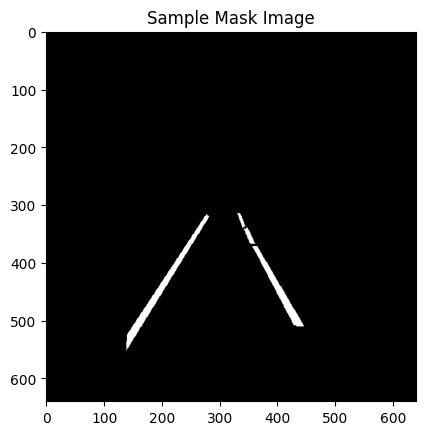

Unique values in mask: {np.uint8(0), np.uint8(1)}


In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

mask_path = '/content/data/train/masks/-02_mp4-0035_jpg.rf.1d0c62696d772f20003e3d3476502c93_mask.png'  # 실제 마스크 파일명으로 변경
mask_img = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(mask_img, cmap='gray')
plt.title("Sample Mask Image")
plt.show()
print("Unique values in mask:", set(mask_img.flatten()))
# 마스크 이미지가 라벨링 잘 되어있는지 확인하는 코드

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)

    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for images, masks in valid_loader:
            images = images.to(device)
            masks = masks.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, masks)
            valid_loss += loss.item()
    avg_valid_loss = valid_loss / len(valid_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {avg_train_loss:.4f} Valid Loss: {avg_valid_loss:.4f}")

# Save the trained model
torch.save(model.state_dict(), 'lane_segmentation_model.pth')
print("Model saved to lane_segmentation_model.pth")

Epoch [1/10] Train Loss: 0.9502 Valid Loss: 0.9192
Epoch [2/10] Train Loss: 0.8701 Valid Loss: 0.8346
Epoch [3/10] Train Loss: 0.7455 Valid Loss: 0.6978
Epoch [4/10] Train Loss: 0.5726 Valid Loss: 0.5449
Epoch [5/10] Train Loss: 0.4249 Valid Loss: 0.4341
Epoch [6/10] Train Loss: 0.3304 Valid Loss: 0.3705
Epoch [7/10] Train Loss: 0.2735 Valid Loss: 0.3266
Epoch [8/10] Train Loss: 0.2383 Valid Loss: 0.3052
Epoch [9/10] Train Loss: 0.2183 Valid Loss: 0.2900
Epoch [10/10] Train Loss: 0.1955 Valid Loss: 0.2870
Model saved to lane_segmentation_model.pth


- 여러 에폭 동안 학습 데이터로 모델 학습 수행
- 각 에폭마다 학습 손실과 검증 손실 출력
- 학습 완료 후 학습된 모델 파라미터 저장

In [ ]:
import segmentation_models_pytorch as smp
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights=None,
    in_channels=3,
    classes=1
)
model.load_state_dict(torch.load('lane_segmentation_model.pth'))
model = model.to(device)
model.eval()

# 위 코드는 학습을 마친 UNet 기반 차선 세그멘테이션 모델을 불러와 GPU가 있으면 GPU에서 실행하도록 준비하며, 추론용으로 최적의 상태로 설정하는 과정입니다.
# 이 상태에서 입력 이미지나 영상 프레임을 넣으면 차선 영역을 분할하는 예측 결과를 얻을 수 있습니다.

Using device: cuda


Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [ ]:
from google.colab import files

# 컴퓨터에서 영상 파일 업로드
uploaded = files.upload()

# 업로드한 영상파일명 가져오기
video_filename = list(uploaded.keys())[0]
print(f"업로드된 영상 파일명: {video_filename}")


Saving test.mp4 to test.mp4
업로드된 영상 파일명: test.mp4


In [ ]:
import cv2
import numpy as np
import torch

def preprocess_frame(frame):
    # BGR -> RGB 변환
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # 모델과 같은 크기로 리사이즈 (예: 256x256)
    frame = cv2.resize(frame, (256, 256))
    # 0~1 정규화
    frame = frame / 255.0
    # 표준화 (학습 시 사용한 값과 동일하게)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    frame = (frame - mean) / std
    # 채널 순서 (HWC -> CHW)
    frame = frame.transpose(2, 0, 1)
    # Tensor 변환, 배치 차원 추가, device 할당
    tensor = torch.tensor(frame, dtype=torch.float32).unsqueeze(0).to(device)
    return tensor


In [ ]:
def postprocess_mask(mask_pred, original_shape):
    # 시그모이드 활성화 후 0.5 임계값 적용
    mask_pred = torch.sigmoid(mask_pred).cpu().detach().numpy()[0, 0]
    mask_pred = (mask_pred > 0.5).astype(np.uint8) * 255
    # 원본 영상 크기로 리사이즈
    mask_pred = cv2.resize(mask_pred, (original_shape[1], original_shape[0]))
    return mask_pred

In [ ]:
# OpenCV로 영상 열기
cap = cv2.VideoCapture(video_filename)

# 저장할 결과 영상 파일명 및 코덱 설정 (mp4, 20fps)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = None

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    h, w = frame.shape[:2]

    # 영상 프레임 전처리
    input_tensor = preprocess_frame(frame)

    # 모델 추론
    with torch.no_grad():
        output = model(input_tensor)

    # 마스크 후처리
    lane_mask = postprocess_mask(output, (h, w))

    # 차선 마스크 빨간색 오버레이 생성
    overlay = frame.copy()
    overlay[lane_mask == 255] = [0, 0, 255]  # 빨간색

    # 원본 영상과 마스크 오버레이 합성
    alpha = 0.5
    output_frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

    if out is None:
        out = cv2.VideoWriter('lane_detection_result.mp4', fourcc, 20.0, (w, h))
    out.write(output_frame)

cap.release()
out.release()

print("차선 인식 영상이 lane_detection_result.mp4 로 저장되었습니다.")


차선 인식 영상이 lane_detection_result.mp4 로 저장되었습니다.


In [ ]:
# 영상 저장 코드
from google.colab import files
files.download('lane_detection_result.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
print("파일 존재 여부:", os.path.exists('lane_detection_result.mp4'))
print("파일 크기(Bytes):", os.path.getsize('lane_detection_result.mp4') if os.path.exists('lane_detection_result.mp4') else "파일 없음")
# (자꾸 오류나서 파일 있는게 맞는지 확인해본 코드)

파일 존재 여부: True
파일 크기(Bytes): 472689084
